In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/pokemon_data.csv')
print(df.shape)
df.head()

(800, 12)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
df[df.isna().any(axis=1)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False


# 1. Handling NaN Values

In [4]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

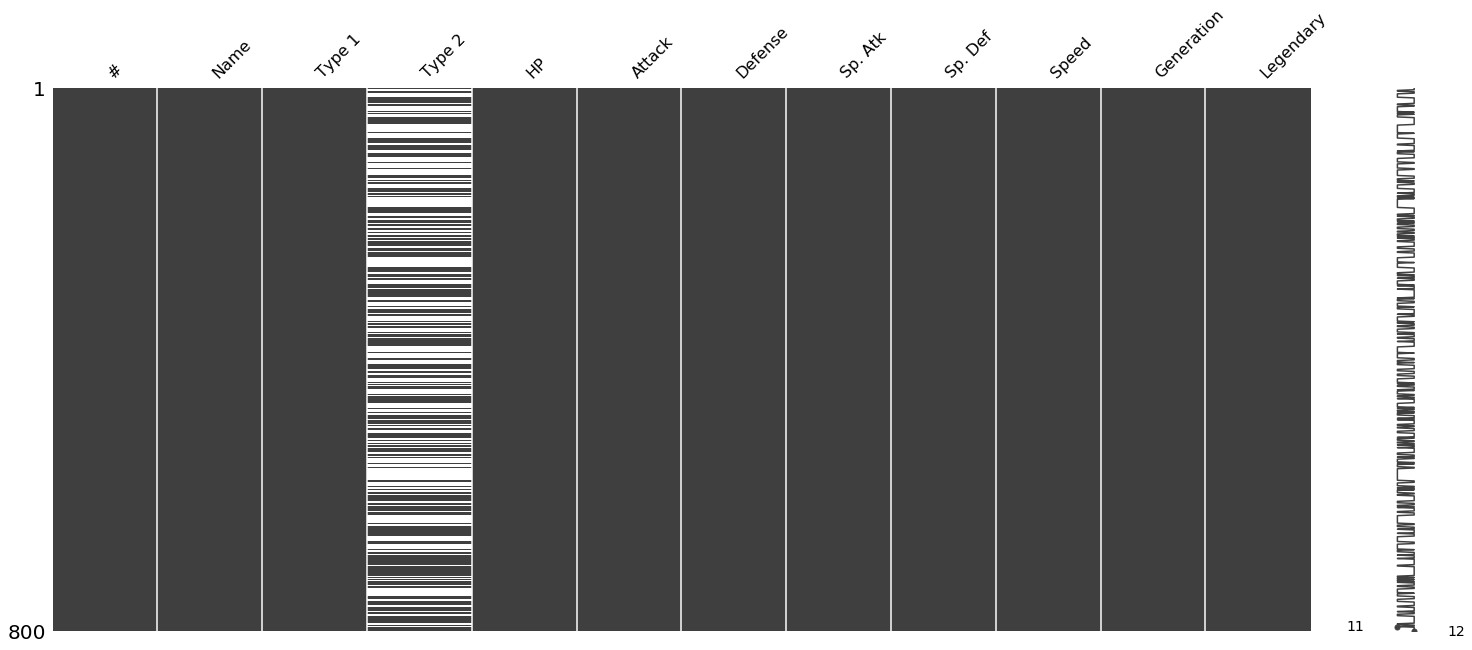

In [5]:
msno.matrix(df)
plt.show()

#### We can see that there are many NaN values(386) in Type 2 column. Let's fix it.

#### After few google searches, I found out that the pokemons having NaN values in <em>Type 2</em> column doesn't even are of two types, they are of only one type thats why their <em>Type 2</em>

#### column is a NaN Value.

#### I can't drop those rows because it will ruin the dataset for further analysis. So I filled the <em>Type 2</em> values with <em>Type 1</em> values.

In [6]:
df['Type 2'].fillna(value=df['Type 1'], inplace=True)

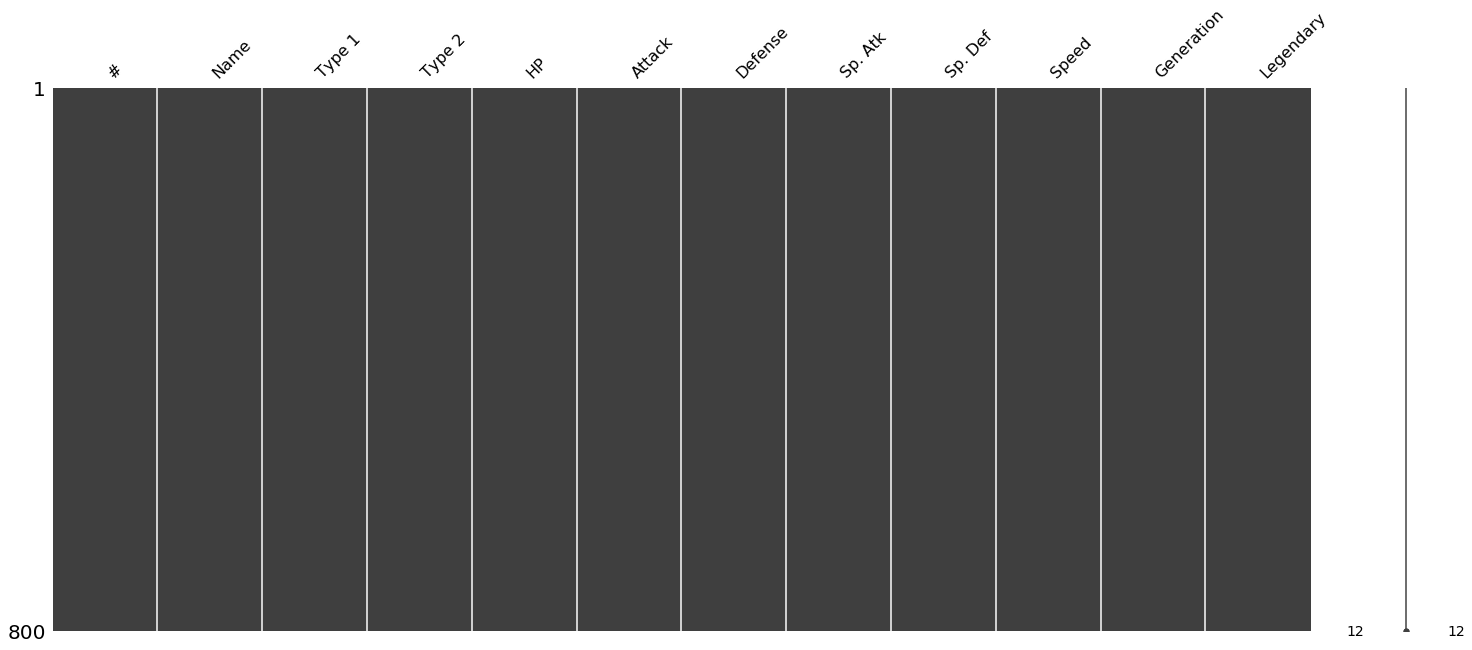

In [8]:
msno.matrix(df)
plt.show()

### Great, Our data is clean.

In [12]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,39,52,43,60,50,65,1,False


#### That "#" column is useless. I'm dropping it.

In [14]:
df.drop(columns='#', inplace=True)

In [16]:
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,39,52,43,60,50,65,1,False


# 2. Data Analysis

## Question: Who is the most powerful pokemon?

#### The most powerful pokemon will have the best attack, defense, HP, Special attack, Special defense and speed. It's kindoff a long process to check these stats of every pokemon.

#### What can I do is to take the sum of all these stats and store them in a new feature column say "total", it will make our work easier.

In [61]:
#df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']  *alternate method*

df['Total'] = df.iloc[:, 3:9].sum(axis=1)

In [145]:
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,Charmander,Fire,Fire,39,52,43,60,50,65,1,False,309


In [198]:
df.groupby(df['Name']).mean().sort_values('Total', ascending=False).head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Name,,,,,,,,,
MewtwoMega Mewtwo Y,106,150,70,194,120,140,1,True,780
MewtwoMega Mewtwo X,106,190,100,154,100,130,1,True,780
RayquazaMega Rayquaza,105,180,100,180,100,115,3,True,780
KyogrePrimal Kyogre,100,150,90,180,160,90,3,True,770
GroudonPrimal Groudon,100,180,160,150,90,90,3,True,770


### Mewtwo Y is the most powerful pokemon.

## Question 2: What type of pokemons are most in number?

### Type 1

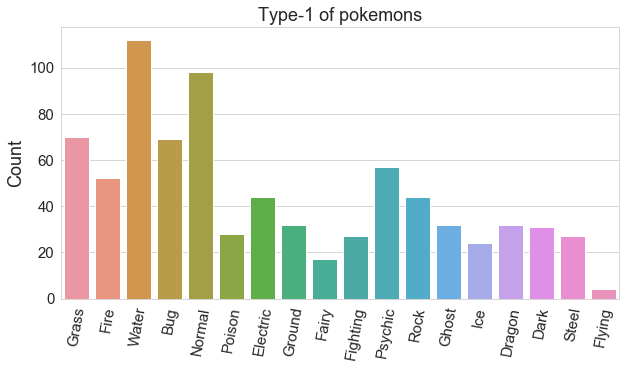

In [275]:
plt.figure(figsize=(10,5))
sns.countplot('Type 1',data=df)
sns.set_style('whitegrid')
plt.title('Type-1 of pokemons', fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xlabel(None)
plt.xticks(rotation=80, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Water type pokemons are maximum in number.

### Type 2

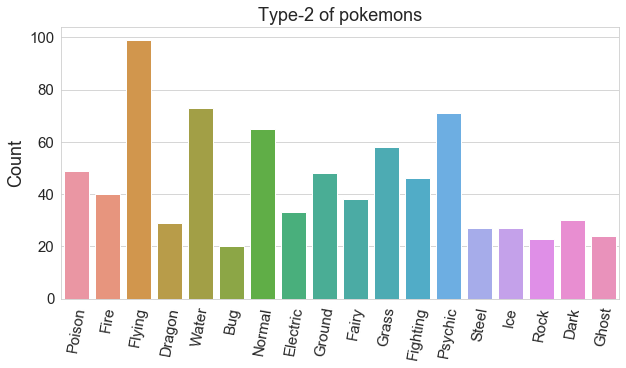

In [280]:
plt.figure(figsize=(10,5))
sns.countplot('Type 2',data=df)
sns.set_style('whitegrid')
plt.title('Type-2 of pokemons', fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xlabel(None)
plt.xticks(rotation=80, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Flying type pokemon are maximum in number.